# §2 記述統計

#### Packageの読み込み

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Dataの読み込み

In [2]:
df1 = pd.read_csv("./csv/japan/newly_confirmed_cases_daily.csv")
df1

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2020/1/16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020/1/17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020/1/18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020/1/19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020/1/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,2023/5/4,7303,474,48,53,188,35,63,107,249,...,21,10,189,28,38,56,80,54,63,150
1205,2023/5/5,5793,354,74,61,105,36,56,74,76,...,65,18,207,19,48,70,60,23,68,172
1206,2023/5/6,6257,446,61,84,154,38,79,116,69,...,24,9,202,33,48,68,70,38,29,125
1207,2023/5/7,14344,658,127,116,293,133,117,188,106,...,105,40,687,87,114,133,121,95,168,254


#### Indexを変更し日付型に変換

In [3]:
df2 = df1.set_index("Date")
df2.index = pd.to_datetime(df2.index)
print(df2.index.dtype)
df2.head(3)

datetime64[ns]


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 原系列の定義

In [4]:
df3 = df2[(df2.index >= '2020-05-01') & (df2.index <= '2023-04-30')]
df = df3[["ALL"]].copy()
df.rename(columns={"ALL": "original"}, inplace = True)

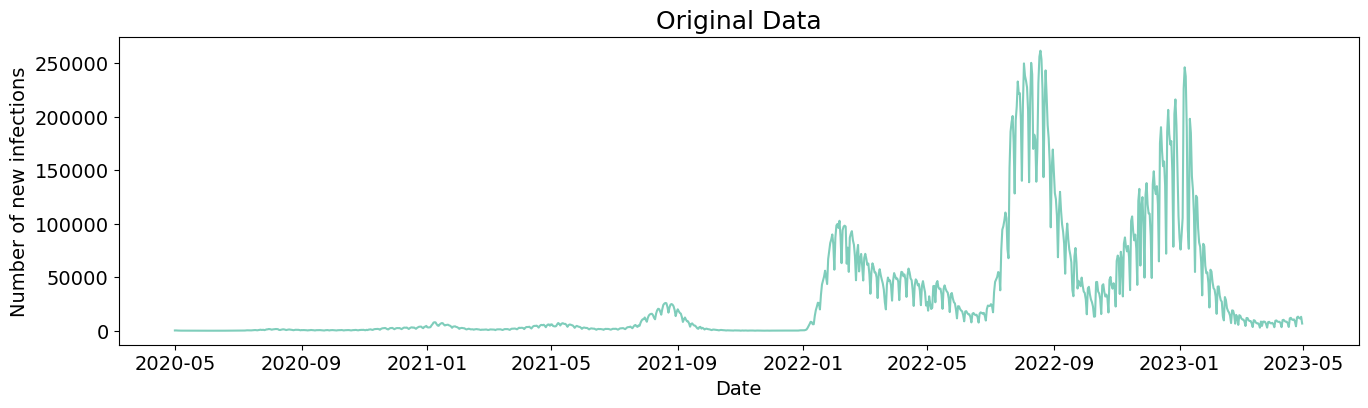

In [5]:
plt.figure(figsize=(16, 4))

# 原系列
plt.plot(df.index, df["original"], label='Original',color = "#7FCDBB")
plt.title('Original Data', fontsize=18)
plt.xlabel('Date', fontsize=14) 
plt.ylabel('Number of new infections', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 

plt.savefig("./image/original1.jpeg", dpi = 300)

plt.show()

#### 欠損値および新規感染者数 0の日がないことを確認

In [6]:
print("欠損値の有無:", df.isna().sum())
print("value0の有無:", (df == 0).sum())

欠損値の有無: original    0
dtype: int64
value0の有無: original    0
dtype: int64


#### 基本統計量

In [7]:
df[["original"]].describe().T

,count,mean,std,min,25%,50%,75%,max
original,1095.0,30723.8621,51465.762933,20.0,983.0,5508.0,40941.0,261735.0


*To be continue...*